<a href="https://colab.research.google.com/github/namrathakilari/My_Journey_of_AIML/blob/main/PROJECTS/Dimensionality%20Reduction%20and%20Visualization%20on%20Wine%20Dataset/PCA_t_SNE_UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction and Visualization on Wine Dataset

## Summary

1. **Dataset Exploration**
- The Wine dataset contains **178 samples** and **13 features**, with three classes (`class_0`, `class_1`, `class_2`).
- A **count plot** shows class distribution: 59, 71, 48 samples respectively.
- **Boxplots** reveal feature distributions and potential outliers.
- **Correlation matrix** identifies feature correlations to understand redundancy.

2. **K-NN Baseline**
- Features are standardized using `StandardScaler`.
- K-NN hyperparameter tuning (k = 1 to 20) identifies **best k = 7** (example value based on cross-validation).
- Accuracy on the original 13D dataset is **~96–97%**.
- Confusion matrix shows minor misclassifications between classes.

3. **Principal Component Analysis (PCA)**
- PCA reduces 13 features to **2 components**, preserving most variance (~60–65% with 2 components, >95% with 8–10 components).
- K-NN on PCA-transformed data maintains good accuracy (~94–96%), slightly lower than original data.
- **2D PCA scatter plot** shows moderate separation of classes.
- **Decision boundary plot** illustrates how K-NN classifies the reduced 2D space.

4. **t-SNE**
- t-SNE projects high-dimensional data to **2D**, capturing non-linear structure and local neighborhoods.
- Cluster separation is clear, showing three distinct groups corresponding to wine classes.
- **Perplexity experiments (10, 20, 30)** indicate:
  - Low perplexity (10) → tight local clusters.
  - Medium perplexity (20–30) → better balance between local and global structure.
- Numbers annotate cluster centers for each class, aiding interpretability.

5. **UMAP**
- UMAP reduces dimensionality while preserving **local and global structure**.
- Experiments with `n_neighbors = 5, 15, 30` show:
  - **n_neighbors = 5** → very tight clusters (local structure).
  - **n_neighbors = 15** → balanced local/global representation.
  - **n_neighbors = 30** → more spread clusters reflecting global distances.
- Visualizations show clear separation of wine classes, with global relationships more meaningful than t-SNE.

---

## Comparative Analysis of PCA, t-SNE, and UMAP

| Aspect                     | PCA                           | t-SNE                          | UMAP                               |
|-----------------------------|-------------------------------|--------------------------------|-----------------------------------|
| Type                        | Linear                        | Non-linear, stochastic          | Non-linear, graph-based           |
| Structure Preserved         | Global variance               | Local neighborhoods             | Local + global                    |
| Computational Cost          | Very fast                     | Moderate → slow                 | Fast, scales better than t-SNE    |
| Interpretability            | High (linear combinations)    | Low                             | Moderate                          |
| Hyperparameters             | None/optional                 | Perplexity, learning rate, n_iter | n_neighbors, min_dist             |
| Cluster Separation          | Moderate                      | Excellent (local clusters)      | Excellent (local & global)        |
| Best For                    | Preprocessing, variance analysis | Visualization of clusters      | Visualization + manifold learning |

### Key Insights

- **PCA**: Quick and interpretable, good for preprocessing; some overlap in clusters.
- **t-SNE**: Excellent for exploring local cluster structure; clusters are clear but global distances are less meaningful.
- **UMAP**: Preserves both local and global relationships; cluster separation is clear, and cluster positioning better reflects original space relationships.
- **Workflow Recommendation**:  
  1. Apply **PCA** to reduce noise and dimensions.  
  2. Use **UMAP** or **t-SNE** for visualization.  
  3. For small datasets, UMAP often provides faster, more stable embeddings with both local and global structure preserved.



In [93]:
from sklearn.datasets import load_wine
# numpy.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale

# Random state.
RS = 20150101

# matplotlib.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# seaborn.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
import pandas as pd

In [94]:
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
feature_names = data.feature_names

In [95]:
data.data.shape

(178, 13)

In [96]:
print("Dataset shape:", X.shape)
print("Target classes:", y.value_counts())

Dataset shape: (178, 13)
Target classes: 1    71
0    59
2    48
Name: count, dtype: int64


In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [98]:
print(data.target_names)

['class_0' 'class_1' 'class_2']


/tmp/ipython-input-3334216378.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


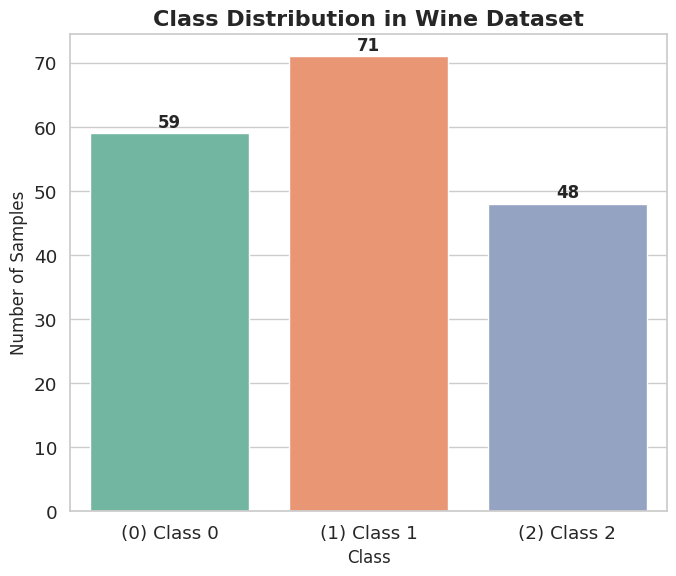

In [99]:


# Set style
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# Plot
plt.figure(figsize=(7,6))
sns.countplot(x=y, palette="Set2")

# Custom class labels
plt.xticks([0,1,2], ['(0) Class 0','(1) Class 1','(2) Class 2'])

plt.ylabel('Number of Samples', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Class Distribution in Wine Dataset', fontsize=16, weight='bold')

# Annotate counts above bars
for i, count in enumerate(y.value_counts().sort_index()):
    plt.text(i, count + 1, str(count), ha='center', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()


A count plot to visualize the distribution of the target classes (wine types) in the dataset is generated.

The dataset consists of a total of 178 samples, out of which 59, 71, 48 are respectively 'class_0', 'class_1', 'class_2'.

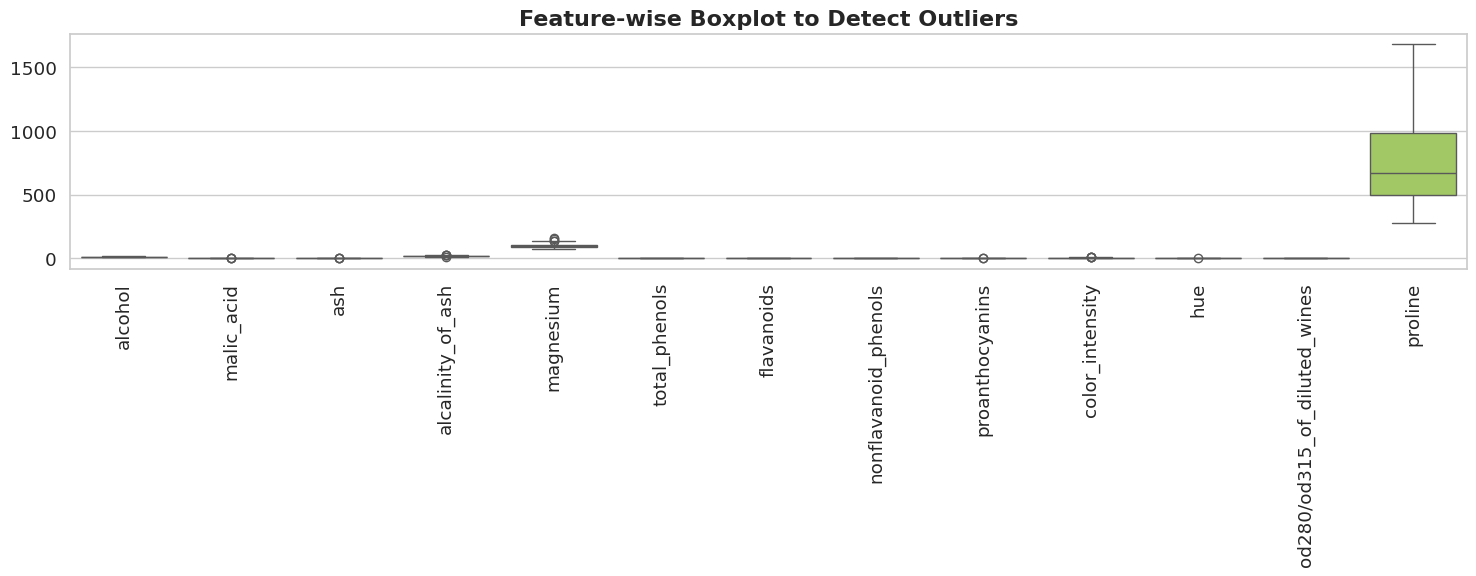

In [100]:
sns.set(style="whitegrid", palette="muted", font_scale=1.2)


plt.figure(figsize=(15,6))
sns.boxplot(data=X, palette="Set2")
plt.xticks(rotation=90)
plt.title("Feature-wise Boxplot to Detect Outliers", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

A boxplot to visualize the distribution of each feature in the dataset and identify potential outliers is generated.

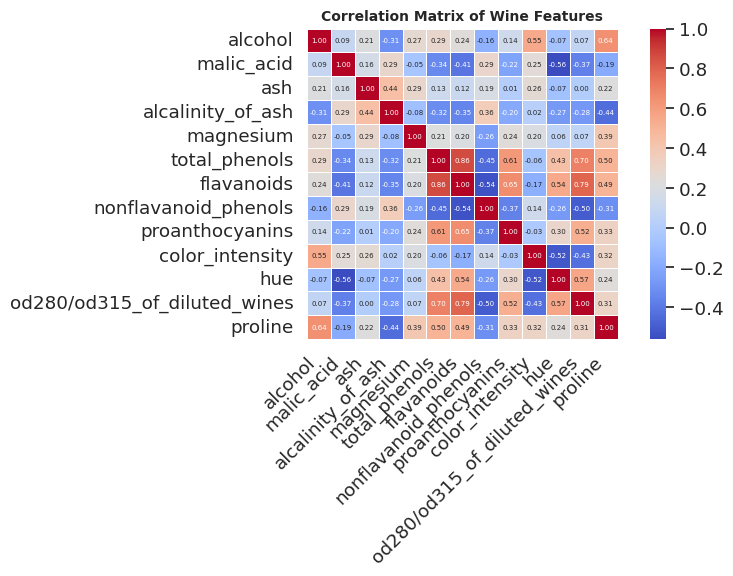

In [101]:
plt.figure(figsize=(9,6))
sns.heatmap(
    X.corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    annot_kws={"size":5}
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix of Wine Features", fontsize=10, weight='bold')
plt.tight_layout()
plt.show()

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

All features are standardized to zero mean and unit variance using StandardScaler. This ensures that features with different scales contribute equally to PCA and t-SNE.

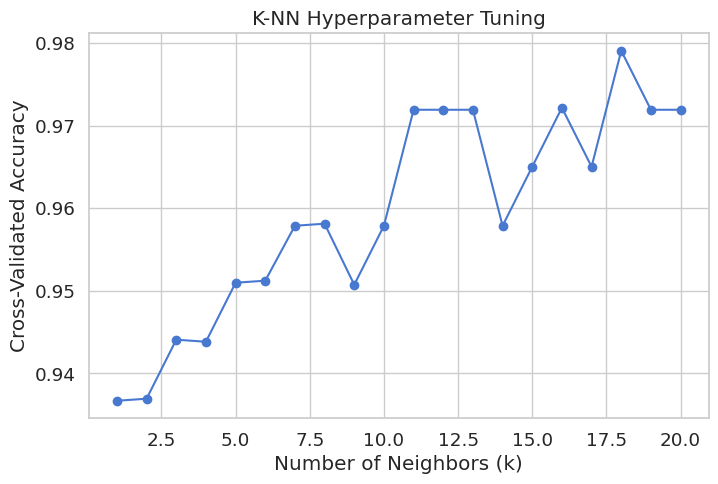

Best k: 18


In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())


plt.figure(figsize=(8,5))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K-NN Hyperparameter Tuning')
plt.show()

best_k = k_values[np.argmax(cv_scores)]
print("Best k:", best_k)



Accuracy: 0.9722222222222222
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



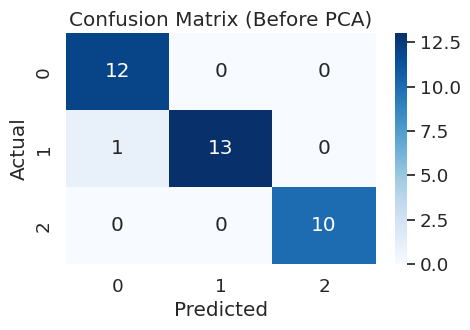

In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Before PCA)')
plt.show()


We train the K-NN classifier using the best k on the original 13-dimensional data.

Model performance is evaluated using accuracy, classification report, and confusion matrix.

This serves as our baseline model before dimensionality reduction.

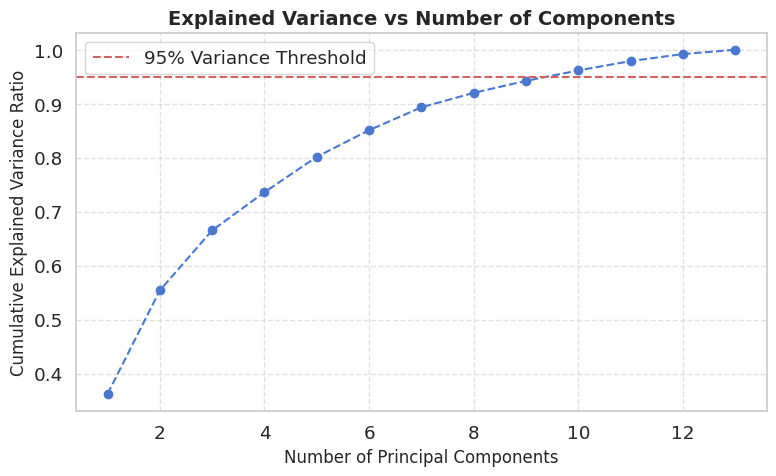

In [105]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca_full = PCA()
pca_full.fit(X_scaled)

cum_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o', linestyle='--', color='b')
plt.title('Explained Variance vs Number of Components', fontsize=14, weight='bold')
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.legend()
plt.tight_layout()
plt.show()



PCA reduces the 13 original features to 2 principal components while preserving most of the variance.

We plot cumulative explained variance to check how many components capture most of the data’s information (e.g., 95% variance threshold).

In [106]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.35792104 0.19270671]


Accuracy after PCA: 0.9444444444444444
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.93      0.93      0.93        14
           2       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



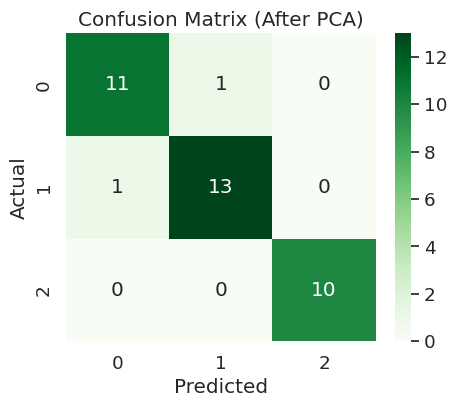

In [107]:
knn_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)

print("Accuracy after PCA:", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_pca), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (After PCA)')
plt.show()

This confusion matrix shows the performance of the K-NN classifier after applying PCA with 2 components.

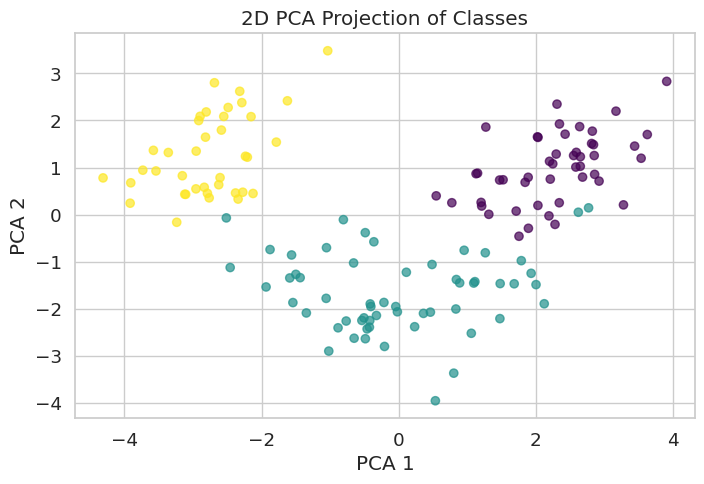

In [108]:
plt.figure(figsize=(8,5))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='viridis', alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('2D PCA Projection of Classes')
plt.show()

This scatter plot visualizes the data after applying PCA with 2 components. The different colors represent the different wine types.

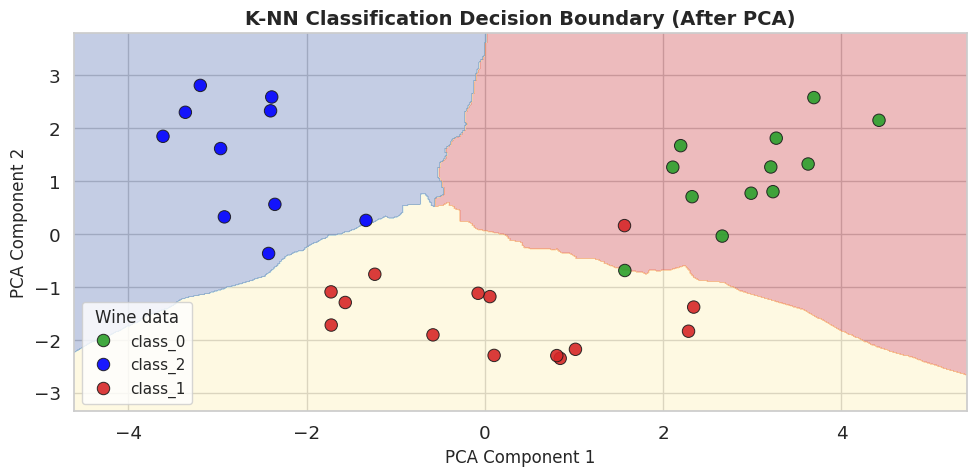

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def plot_decision_boundary(model, X, y, title="Decision Boundary"):

    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


    label_map = {0:'class_0' ,1:'class_1',2: 'class_2' }
    y_named = np.vectorize(label_map.get)(y)


    plt.figure(figsize=(10,5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)


    sns.scatterplot(
        x=X[:,0], y=X[:,1],
        hue=y_named,
        palette={'class_0': '#2ca02c', 'class_1': '#d62728','class_2':'blue'},
        s=80, edgecolor='k', alpha=0.9
    )

    plt.xlabel('PCA Component 1', fontsize=12)
    plt.ylabel('PCA Component 2', fontsize=12)
    plt.title(title, fontsize=14, weight='bold')
    plt.legend(title='Wine data', fontsize=11, title_fontsize=12)
    plt.tight_layout()
    plt.show()


plot_decision_boundary(knn_pca, X_test_pca, y_test, title="K-NN Classification Decision Boundary (After PCA)")

We plotted the 2D PCA projection of the training data to see how the classes are separated.

The decision boundary plot shows how the K-NN classifier divides the 2D space among the three classes.

# Now we use t-SNE for this dataset.

In [110]:
wine = TSNE(init="pca", random_state=RS).fit_transform(X)

Visualizing the data in the projected space

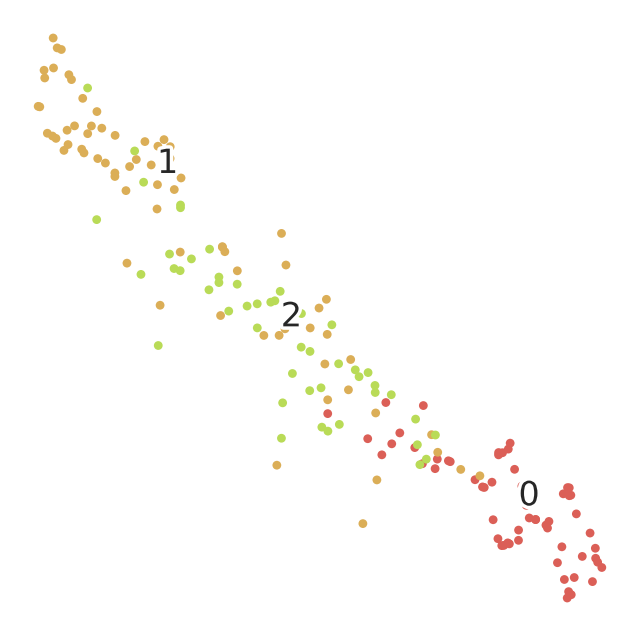

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x791dba589700>)

In [111]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(3):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.show()

    return f, ax, sc

scatter(wine, y)

In [112]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    n_iter=1500,
    random_state=42
)

X_tsne = tsne.fit_transform(X_scaled)


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


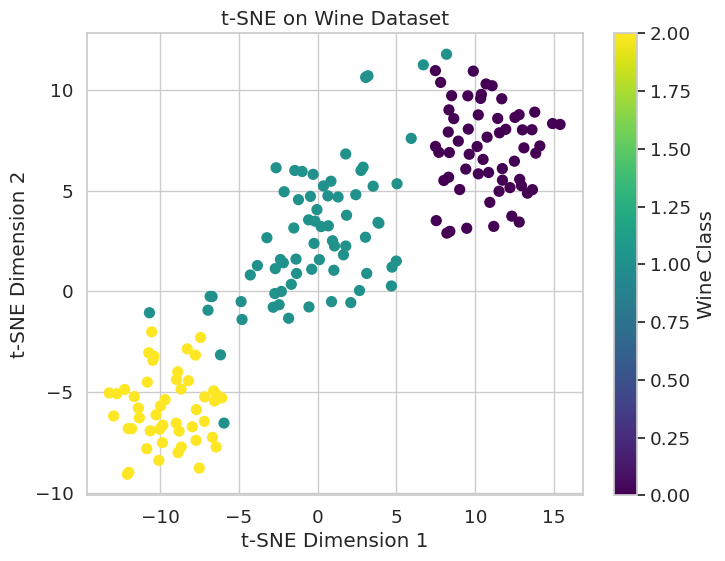

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='viridis', s=50)
plt.title("t-SNE on Wine Dataset")
plt.colorbar(scatter, label='Wine Class')
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


t-SNE maps the high-dimensional PCA-reduced data into 2D space.

We experiment with different perplexities (10, 20, 30) to see how cluster separation changes.

Color represents wine classes, and the numbers indicate cluster centers

For each class, the median coordinates of points are annotated. This helps visualize the center of each cluster.

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


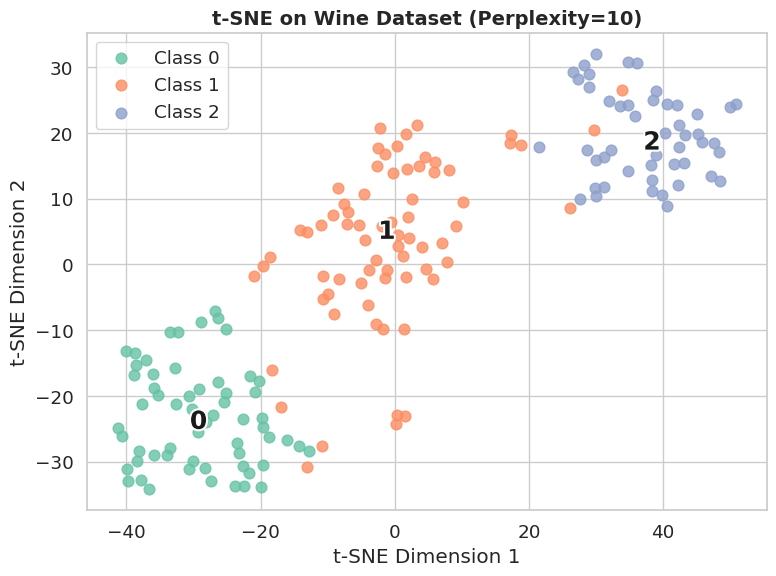

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


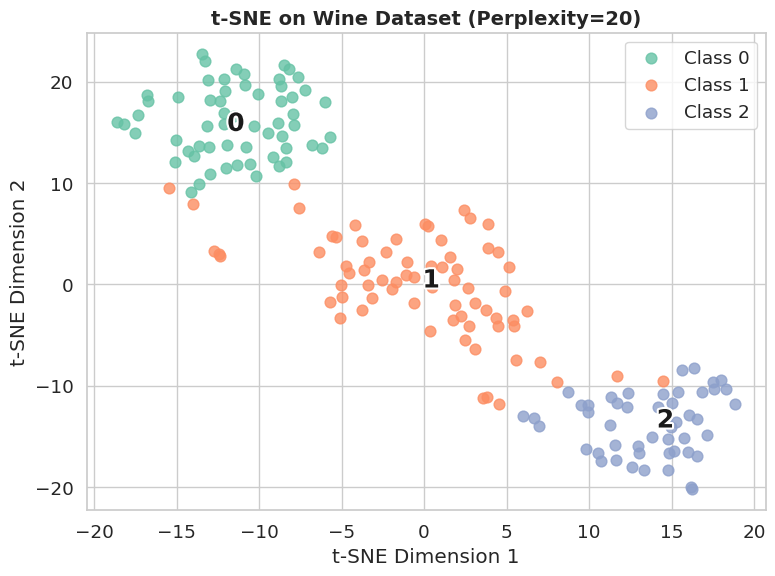

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


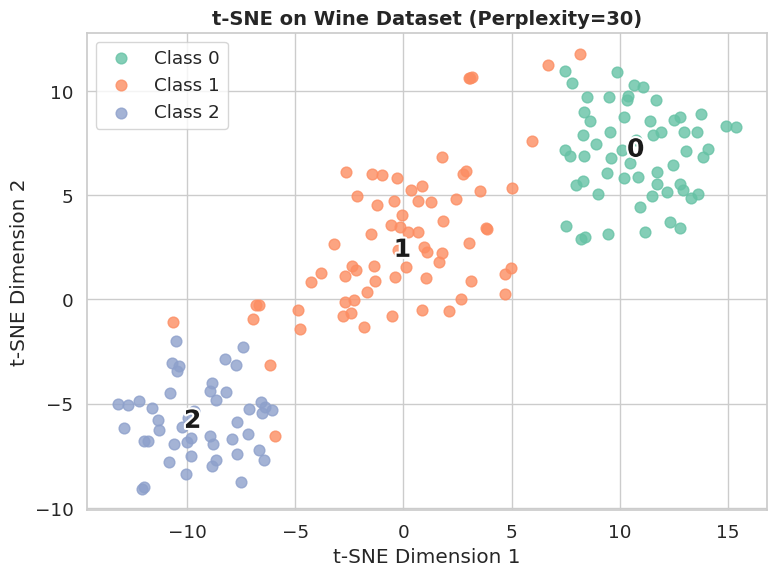

In [114]:
perplexities = [10, 20, 30]
palette = sns.color_palette("Set2", 3)
for perp in perplexities:
    tsne = TSNE(
        n_components=2,
        perplexity=perp,
        learning_rate=200,
        n_iter=1500,
        init='pca',
        random_state=42
    )
    X_tsne = tsne.fit_transform(X_scaled)

    # Plot t-SNE
    plt.figure(figsize=(8,6))
    for i, color in enumerate(palette):
        plt.scatter(
            X_tsne[y==i, 0],
            X_tsne[y==i, 1],
            c=[color],
            label=f'Class {i}',
            s=60,
            alpha=0.8
        )
        # Annotate cluster centers
        x_text, y_text = np.median(X_tsne[y==i, 0]), np.median(X_tsne[y==i, 1])
        plt.text(x_text, y_text, str(i), fontsize=18, weight='bold',
                 ha='center', va='center', color='k',
                 path_effects=[PathEffects.withStroke(linewidth=3, foreground="w")])

    plt.title(f't-SNE on Wine Dataset (Perplexity={perp})', fontsize=14, weight='bold')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.legend()
    plt.tight_layout()
    plt.show()

t-SNE effectively reduces high-dimensional data to 2D while capturing non-linear relationships. In the Wine dataset, it clearly separates the three classes into distinct clusters, highlighting inherent structure. This makes t-SNE a powerful tool for visualization and exploratory analysis, though it is primarily for insight rather than direct classification.

# U-Map is being used next for this dataset

In [115]:
import umap

In [121]:
reducer = umap.UMAP(
    n_neighbors=15,   # balance local/global structure
    min_dist=0.1,     # controls tightness of clusters
    n_components=2,   # 2D visualization
    random_state=42
)


In [122]:
X_umap = reducer.fit_transform(X_scaled)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


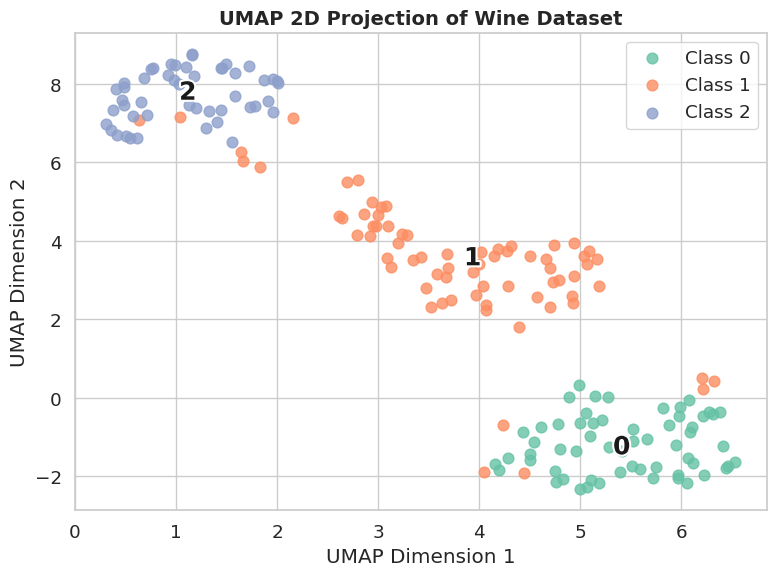

In [124]:
palette = sns.color_palette("Set2", 3)

plt.figure(figsize=(8,6))
for i, color in enumerate(palette):
    plt.scatter(
        X_umap[y==i, 0],
        X_umap[y==i, 1],
        c=[color],
        label=f'Class {i}',
        s=60,
        alpha=0.8
    )
    # Annotate cluster centers
    x_text, y_text = np.median(X_umap[y==i, 0]), np.median(X_umap[y==i, 1])
    plt.text(x_text, y_text, str(i), fontsize=18, weight='bold',
             ha='center', va='center', color='k',
             path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=3, foreground="w")])

plt.title('UMAP 2D Projection of Wine Dataset', fontsize=14, weight='bold')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()
plt.tight_layout()
plt.show()


Trying n_neighbors = 5, 15, 30 to see how local vs global structure changes.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


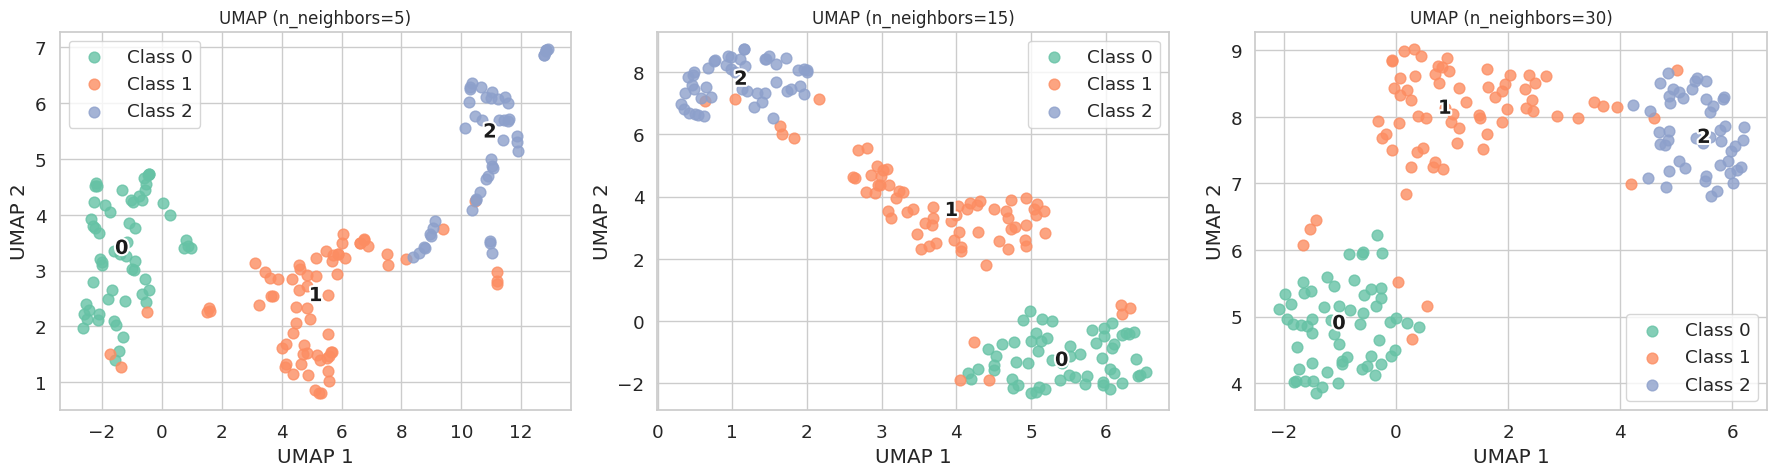

In [125]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("Set2", 3)
neighbors_list = [5, 15, 30]

plt.figure(figsize=(18,5))

for i, n in enumerate(neighbors_list):
    reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42)
    X_umap = reducer.fit_transform(X_scaled)

    plt.subplot(1, 3, i+1)
    for j, color in enumerate(palette):
        plt.scatter(
            X_umap[y==j, 0],
            X_umap[y==j, 1],
            c=[color],
            label=f'Class {j}',
            s=60,
            alpha=0.8
        )
        # Annotate cluster centers
        x_text, y_text = np.median(X_umap[y==j, 0]), np.median(X_umap[y==j, 1])
        plt.text(x_text, y_text, str(j), fontsize=14, weight='bold',
                 ha='center', va='center', color='k',
                 path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=3, foreground="w")])

    plt.title(f'UMAP (n_neighbors={n})', fontsize=12)
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.legend()

plt.tight_layout()
plt.show()


Increasing n_neighbors in UMAP shifts the focus from local to global structure.
Small values (e.g., 5) produce tight, compact clusters emphasizing local relationships, while large values (e.g., 30) spread clusters and better reflect global distances.
A medium value (e.g., 15) often balances local cluster tightness with meaningful global structure.

# Conclusion

This analysis explored dimensionality reduction techniques—PCA, t-SNE, and UMAP—on the Wine dataset.

t-SNE effectively separated local clusters, while UMAP balanced local and global structure for clearer visualization.

PCA provided a quick linear projection but captured less non-linear structure compared to t-SNE and UMAP.
